In [1]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

data = pd.read_csv("../data/Trans2.csv")
data.Date = pd.to_datetime(data.Date, format="%m/%d/%Y")
data['Date_Delta'] = (data['Date'] - data['Date'].min())  / np.timedelta64(1,'D')
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data.head()

,Entity,Account,Date,Description,Amount,Date_Delta,Year,Month
0,100-100001,41101,2012-07-01,Record PY prpd txs as CY,-116018.63,0.0,2012,7
1,100-100001,41103,2012-07-01,Record PY prpd txs as CY,-1343129.12,0.0,2012,7
2,100-100001,41201,2012-07-01,accrue sales&use tax 7/16,1901125.37,0.0,2012,7
3,100-100001,41202,2012-07-01,accrue sales&use tax 7/16,866051.86,0.0,2012,7
4,100-100001,41203,2012-07-01,accrue sales&use tax 7/16,575521.51,0.0,2012,7


In [2]:
data.dtypes
data.Entity.value_counts()
data.Entity.nunique()

655

In [3]:
dataA = data[data.Entity == "100-310002"]
dataA.head()
dataA.dtypes
data2013 = data[data.Year == 2013]

data2013.dtypes



Entity                 object
Account                 int64
Date           datetime64[ns]
Description            object
Amount                float64
Date_Delta            float64
Year                    int64
Month                   int64
dtype: object

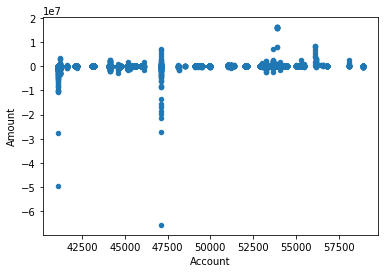

In [4]:
data2013.plot(kind='scatter', x='Account', y='Amount')

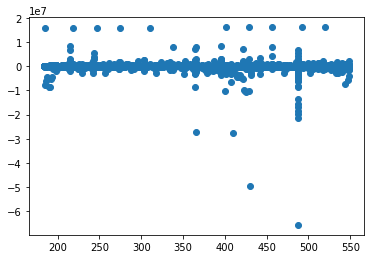

In [5]:
plt.scatter(data2013.Date_Delta, data2013.Amount)

In [6]:
lm = smf.ols(formula='Amount ~ Account + Date_Delta', data=data2013).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     95.54
Date:                Fri, 30 Nov 2018   Prob (F-statistic):           3.39e-42
Time:                        14:21:57   Log-Likelihood:            -2.4834e+06
No. Observations:              177096   AIC:                         4.967e+06
Df Residuals:                  177093   BIC:                         4.967e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -9.58e+04   8058.458    -11.888      0.000   -1.12e+05      -8e+04
Account        2.0474      0.152     13.442      0.000       1.749       2.346
Date_Delta   -17.5138      6.847     -2.558      0.011     -30.934      -4.093
==============================================================================
Omnibus:                   692972.630   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2763232557670.699
Skew:                         -94.918   Prob(JB):                         0.00
Kurtosis:                   19353.361   Cond. No.                     5.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#divide transaction into revenue and expense data sets
dataExp = data[data.Account >= 50000]
dataRev = data[data.Account < 50000]
dataExp2013 = data2013[data.Account >= 50000]
dataRev2013 = data2013[data.Account < 50000]
dataRev2013.head()

c:\python27\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\python27\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Entity,Account,Date,Description,Amount,Date_Delta,Year,Month
80479,100-210355,45308,2013-01-01,109904MARIA AGUIRRE,0.20,184.0,2013,1
80496,100-210415,45308,2013-01-01,109904MARIA AGUIRRE,11.40,184.0,2013,1
80514,100-210530,44194,2013-01-01,to reclass cb 1212272101,-20077.97,184.0,2013,1
80515,100-210532,44194,2013-01-01,to reclass cb 1212272101,-6440.09,184.0,2013,1
80586,100-230230,49410,2013-01-01,65865NC CHILD SUPPORT,44.04,184.0,2013,1


In [8]:
lm = smf.ols(formula='Amount ~ Account + Date_Delta', data=dataRev2013).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.136
Date:                Fri, 30 Nov 2018   Prob (F-statistic):            0.00588
Time:                        14:21:58   Log-Likelihood:            -9.2474e+05
No. Observations:               64165   AIC:                         1.849e+06
Df Residuals:                   64162   BIC:                         1.850e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.035e+04   3.03e+04      0.342      0.732   -4.89e+04    6.96e+04
Account       -0.1029      0.676     -0.152      0.879      -1.427       1.222
Date_Delta   -54.2545     16.941     -3.202      0.001     -87.460     -21.049
==============================================================================
Omnibus:                   246224.002   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     322552656993.822
Skew:                         -89.835   Prob(JB):                         0.00
Kurtosis:                   10985.437   Cond. No.                     7.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
lm = smf.ols(formula='Amount ~ Account + Date_Delta', data=dataExp2013).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     35.26
Date:                Fri, 30 Nov 2018   Prob (F-statistic):           4.90e-16
Time:                        14:21:58   Log-Likelihood:            -1.5213e+06
No. Observations:              112931   AIC:                         3.043e+06
Df Residuals:                  112928   BIC:                         3.043e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.768e+05   2.19e+04     -8.089      0.000    -2.2e+05   -1.34e+05
Account        3.4501      0.411      8.398      0.000       2.645       4.255
Date_Delta     4.7081      4.933      0.954      0.340      -4.961      14.377
==============================================================================
Omnibus:                   414991.725   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     233481559749.565
Skew:                          79.045   Prob(JB):                         0.00
Kurtosis:                    7045.323   Cond. No.                     2.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\python27\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


Text(0,0.5,'Number of Anomalies')

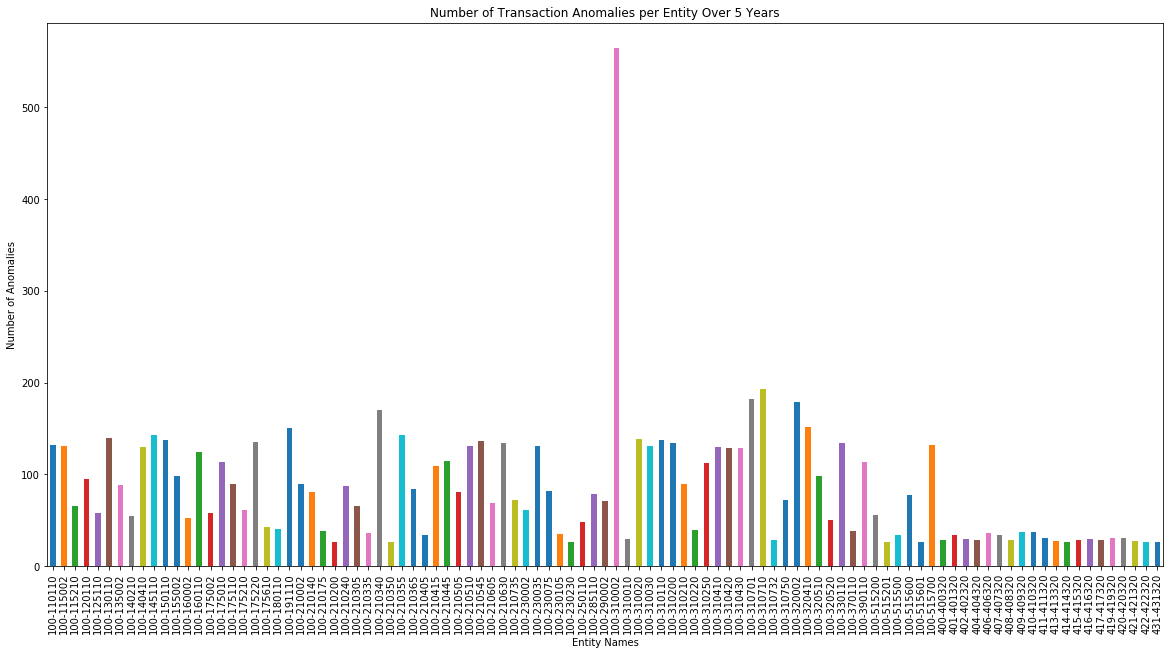

In [10]:
trans_group = data.groupby(by=["Entity"])
transentlist = []
for Entity, group in trans_group:
    transAnomalyCount = 0
    for amt in group.Amount:
        if ((amt - group.Amount.mean()) > 3 * group.Amount.std()):
            transAnomalyCount += 1
    #print Entity
    #print transAnomalyCount
    x = Entity, transAnomalyCount
    transentlist.append(x)

transAnom = pd.Series()
for y in transentlist:
    if (y[1] > 25):
        transAnom.set_value(y[0],y[1])
ta = transAnom.plot(kind='bar', figsize=(20,10), title = 'Number of Transaction Anomalies per Entity Over 5 Years')
ta.set_xlabel("Entity Names")
ta.set_ylabel("Number of Anomalies")

In [ ]:
data[data.Year == 2017].Month.value_counts()